In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC, SVC

In [2]:
data= pd.read_csv('log2.csv')
data

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18
...,...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,allow,314,192,122,6,15,4,2
65528,50964,80,13485,80,allow,4680740,67312,4613428,4675,77,985,3690
65529,54871,445,0,0,drop,70,70,0,1,0,1,0
65530,54870,445,0,0,drop,70,70,0,1,0,1,0


In [3]:
data['Action'].value_counts()

allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64

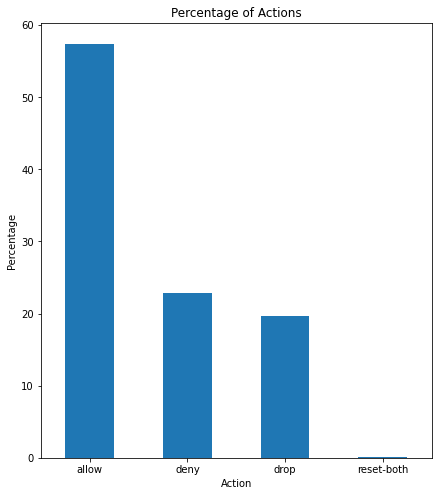

allow         57.437588
deny          22.869743
drop          19.610267
reset-both     0.082402
Name: Action, dtype: float64


In [4]:
# Compute the frequency of each color value and divide by the total count to get percentages
counts = data['Action'].value_counts(normalize=True) * 100

# Set Fig Size
fig, ax = plt.subplots(figsize=(7, 8))

# Create a bar plot of the result
ax = counts.plot(kind='bar', rot=0)

# Add labels and a title to the plot
ax.set_xlabel('Action')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Actions')


# Display the plot
plt.show()
print(counts)

In [5]:
data.memory_usage().sum()

6291200

### Convert Columns to uint32

In [6]:
%%time
for i in data.columns:
    if i in ['Bytes', 'Bytes Sent', 'Bytes Received', 'Packets', 
             'Elapsed Time (sec)', 'pkts_sent', 'pkts_received']:
        data[i]=data[i].astype('uint32')

CPU times: user 14.7 ms, sys: 9.01 ms, total: 23.7 ms
Wall time: 23.2 ms


In [7]:
data.memory_usage().sum()

4456304

### Create Dummies

In [8]:
%%time
for i in ['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port']:
    data= data.join(pd.get_dummies(data[i],prefix=i, dtype=bool))

CPU times: user 1min 18s, sys: 13 s, total: 1min 31s
Wall time: 1min 37s


In [10]:
data

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),...,NAT Destination Port_64932,NAT Destination Port_65054,NAT Destination Port_65100,NAT Destination Port_65128,NAT Destination Port_65253,NAT Destination Port_65264,NAT Destination Port_65387,NAT Destination Port_65427,NAT Destination Port_65534,NAT Destination Port_65535
0,57222,53,54587,53,allow,177,94,83,2,30,...,False,False,False,False,False,False,False,False,False,False
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,...,False,False,False,False,False,False,False,False,False,False
2,6881,50321,43265,50321,allow,238,118,120,2,1199,...,False,False,False,False,False,False,False,False,False,False
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,...,False,False,False,False,False,False,False,False,False,False
4,50002,443,45848,443,allow,25358,6778,18580,31,16,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,allow,314,192,122,6,15,...,False,False,False,False,False,False,False,False,False,False
65528,50964,80,13485,80,allow,4680740,67312,4613428,4675,77,...,False,False,False,False,False,False,False,False,False,False
65529,54871,445,0,0,drop,70,70,0,1,0,...,False,False,False,False,False,False,False,False,False,False
65530,54870,445,0,0,drop,70,70,0,1,0,...,False,False,False,False,False,False,False,False,False,False


In [11]:
data.shape

(65532, 57694)

In [12]:
y=pd.factorize(data['Action'])
y

(array([0, 0, 0, ..., 1, 1, 1]),
 Index(['allow', 'drop', 'deny', 'reset-both'], dtype='object'))

In [13]:
data = data.drop(['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port', 'Action'], axis=1)

In [14]:
data.memory_usage()

Index                            128
Bytes                         262128
Bytes Sent                    262128
Bytes Received                262128
Packets                       262128
                               ...  
NAT Destination Port_65264     65532
NAT Destination Port_65387     65532
NAT Destination Port_65427     65532
NAT Destination Port_65534     65532
NAT Destination Port_65535     65532
Length: 57690, dtype: int64

In [15]:
data.memory_usage().sum()

3781851848

In [16]:
print(data.dtypes)

Bytes                         uint32
Bytes Sent                    uint32
Bytes Received                uint32
Packets                       uint32
Elapsed Time (sec)            uint32
                               ...  
NAT Destination Port_65264      bool
NAT Destination Port_65387      bool
NAT Destination Port_65427      bool
NAT Destination Port_65534      bool
NAT Destination Port_65535      bool
Length: 57689, dtype: object


### Remove Duplicate Columns After Dummy Creation
#### 2,731 Columns Removed

In [18]:
%%time  
# Destination Port== Nat Destination Port
# filter columns that have 'Destination Port' in their name
dest_port_cols = data.filter(regex='Destination Port')

# Identify duplicate columns
dup_cols = dest_port_cols.columns[dest_port_cols.T.duplicated()].tolist()
# Combine the duplicates
dest_port_cols = dest_port_cols.T.drop_duplicates().T

# Print the list of dropped columns
dropped_cols = list(set(dup_cols) - set(dest_port_cols.columns))
# drop columns from the DataFrame
data = data.drop(columns=dropped_cols)
data.shape

CPU times: user 47.3 s, sys: 9.92 s, total: 57.2 s
Wall time: 1min 1s


(65532, 55215)

In [19]:
%%time  
# Source Port== Destination Port
# filter columns that start with 'Source Port' or 'Destination Port'
filtered_cols = data.filter(regex='^(Source Port|Destination Port)')
# Identify duplicate columns
dup_cols = filtered_cols.columns[filtered_cols.T.duplicated()].tolist()
# Combine the duplicates
filtered_cols = filtered_cols.T.drop_duplicates().T
# Print the list of dropped columns
dropped_cols = list(set(dup_cols) - set(filtered_cols.columns))
# drop columns from the DataFrame
data = data.drop(columns=dropped_cols)
data.shape

CPU times: user 2min 47s, sys: 52.2 s, total: 3min 39s
Wall time: 4min 10s


(65532, 54971)

In [20]:
%%time  
# NAT Source== NAT Destination
# filter columns that start with 'NAT Destination' or 'NAT Source'
filtered_cols = data.filter(regex='^(NAT Destination|NAT Source)')
# Identify duplicate columns
dup_cols = filtered_cols.columns[filtered_cols.T.duplicated()].tolist()
# Combine the duplicates
filtered_cols = filtered_cols.T.drop_duplicates().T
# Print the list of dropped columns
dropped_cols = list(set(dup_cols) - set(filtered_cols.columns))
# drop columns from the DataFrame
data = data.drop(columns=dropped_cols)
data.shape

CPU times: user 3min 10s, sys: 1min 12s, total: 4min 23s
Wall time: 4min 49s


(65532, 54958)

In [21]:
data.memory_usage().sum()

3602883956

### Save Transformed Data

In [22]:
import pickle

# Save the DataFrame to a file
with open('data.pickle', 'wb') as f:
    pickle.dump(data, f)

In [23]:
# Save the Y to a file
with open('y.pickle', 'wb') as f:
    pickle.dump(y, f)

## Logistic Regression

### Create Sparse Data Frame 

In [24]:
%%time
sparse_float_dtype = pd.SparseDtype("float", fill_value=0)
sparse_df = data.astype(sparse_float_dtype)
sparse_df.shape

CPU times: user 26.1 s, sys: 2.54 s, total: 28.7 s
Wall time: 34.2 s


(65532, 54958)

In [47]:
# Save the sparse_df to a file
with open('sparse_df.pickle', 'wb') as f:
    pickle.dump(sparse_df, f)

In [25]:
sparse_df.memory_usage().sum()

7142372

### Train/Test Split Sparse DF 80/20

In [29]:
%%time

#Make sure that the same proportion of labels are present in each of the train and test sets as the full df (Stratify)
x_train, x_test, y_train, y_test = train_test_split(sparse_df,y[0], stratify=y[0], test_size=0.2)

CPU times: user 1min 24s, sys: 1.5 s, total: 1min 25s
Wall time: 1min 30s


In [31]:
%%time

lr=LogisticRegression(n_jobs=4)
lr.fit(x_train, y_train)

CPU times: user 4.7 s, sys: 148 ms, total: 4.85 s
Wall time: 16.7 s


LogisticRegression(n_jobs=4)

In [32]:
%%time
preds = lr.predict(x_test)

CPU times: user 3.65 s, sys: 102 ms, total: 3.75 s
Wall time: 3.86 s


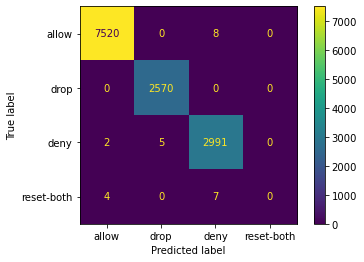

In [36]:
# get the confusion matrix
cm = confusion_matrix(y_test, preds)

# display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y[1])
disp.plot()

In [37]:
print(classification_report(y_test, preds, target_names=y[1], zero_division=0))

              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7528
        drop       1.00      1.00      1.00      2570
        deny       1.00      1.00      1.00      2998
  reset-both       0.00      0.00      0.00        11

    accuracy                           1.00     13107
   macro avg       0.75      0.75      0.75     13107
weighted avg       1.00      1.00      1.00     13107



### Linear SVC

#### Train/Test Split Original Data 80/20

In [39]:
%%time

#Make sure that the same proportion of labels are present in each of the train and test sets as the full df (Stratify)
x_train, x_test, y_train, y_test = train_test_split(data,y[0], stratify=y[0], test_size=0.3)

CPU times: user 8.3 s, sys: 2.96 s, total: 11.3 s
Wall time: 14.5 s


In [42]:
%%time

linear = LinearSVC(dual=False, class_weight='balanced')
linear.fit(x_train,y_train)

CPU times: user 5min 29s, sys: 3min 57s, total: 9min 27s
Wall time: 11min 48s


LinearSVC(class_weight='balanced', dual=False)

In [43]:
%%time
preds = linear.predict(x_test)

CPU times: user 1min 11s, sys: 1min 13s, total: 2min 24s
Wall time: 2min 55s


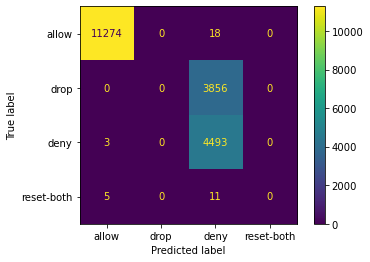

In [44]:
# get the confusion matrix
cm = confusion_matrix(y_test, preds)

# display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y[1])
disp.plot()

In [45]:
print(classification_report(y_test, preds, target_names=y[1], zero_division=0))

              precision    recall  f1-score   support

       allow       1.00      1.00      1.00     11292
        drop       0.00      0.00      0.00      3856
        deny       0.54      1.00      0.70      4496
  reset-both       0.00      0.00      0.00        16

    accuracy                           0.80     19660
   macro avg       0.38      0.50      0.42     19660
weighted avg       0.70      0.80      0.73     19660



In [ ]:
# Load the saved DataFrame from the file
with open('data.pickle', 'rb') as f:
    data = pickle.load(f)
# Load the saved DataFrame from the file
with open('y.pickle', 'rb') as f:
    y = pickle.load(f)
# Load the saved DataFrame from the file
with open('sparse_df.pickle', 'rb') as f:
    sparse_df = pickle.load(f)

In [ ]:
data

,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Source Port_0,Source Port_5,Source Port_20,...,NAT Destination Port_27017,NAT Destination Port_28215,NAT Destination Port_42873,NAT Destination Port_45711,NAT Destination Port_49001,NAT Destination Port_51883,NAT Destination Port_52862,NAT Destination Port_61002,NAT Destination Port_63128,NAT Destination Port_63752
0,177,94,83,2,30,1,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4768,1600,3168,19,17,10,9,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,238,118,120,2,1199,1,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3327,1438,1889,15,17,8,7,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,25358,6778,18580,31,16,13,18,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65527,314,192,122,6,15,4,2,False,False,False,...,False,False,False,False,False,False,False,False,False,False
65528,4680740,67312,4613428,4675,77,985,3690,False,False,False,...,False,False,False,False,False,False,False,False,False,False
65529,70,70,0,1,0,1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
65530,70,70,0,1,0,1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
y

(array([0, 0, 0, ..., 1, 1, 1]),
 Index(['allow', 'drop', 'deny', 'reset-both'], dtype='object'))

In [ ]:
print(data.dtypes)

Bytes                         uint32
Bytes Sent                    uint32
Bytes Received                uint32
Packets                       uint32
Elapsed Time (sec)            uint32
                               ...  
NAT Destination Port_51883      bool
NAT Destination Port_52862      bool
NAT Destination Port_61002      bool
NAT Destination Port_63128      bool
NAT Destination Port_63752      bool
Length: 54958, dtype: object


In [ ]:
sparse_df

,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Source Port_0,Source Port_5,Source Port_20,...,NAT Destination Port_27017,NAT Destination Port_28215,NAT Destination Port_42873,NAT Destination Port_45711,NAT Destination Port_49001,NAT Destination Port_51883,NAT Destination Port_52862,NAT Destination Port_61002,NAT Destination Port_63128,NAT Destination Port_63752
0,177.0,94.0,83.0,2.0,30.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4768.0,1600.0,3168.0,19.0,17.0,10.0,9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,238.0,118.0,120.0,2.0,1199.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3327.0,1438.0,1889.0,15.0,17.0,8.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,25358.0,6778.0,18580.0,31.0,16.0,13.0,18.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65527,314.0,192.0,122.0,6.0,15.0,4.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65528,4680740.0,67312.0,4613428.0,4675.0,77.0,985.0,3690.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65529,70.0,70.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65530,70.0,70.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### SVC

In [ ]:
# select the boolean columns for training
bool_cols = sparse_df.iloc[:, 7:].astype(int)
# select the non-boolean columns for training
non_bool_cols = sparse_df.iloc[:, :7].astype(float)

In [ ]:
%%time

# split data into training and testing sets 60/40
X_train_bool, X_test_bool, y_train, y_test = train_test_split(bool_cols, y[0], test_size=0.4, stratify=y[0], random_state=42)
X_train_non_bool, X_test_non_bool, _, _ = train_test_split(non_bool_cols, y[0], test_size=0.4, stratify=y[0], random_state=42)

CPU times: user 1min 25s, sys: 963 ms, total: 1min 26s
Wall time: 1min 27s


In [ ]:
%%time
from sklearn.preprocessing import StandardScaler

# create a StandardScaler object and fit on the non-boolean training set only
scaler = StandardScaler(with_mean=False)
scaler.fit(X_train_non_bool)

CPU times: user 12.4 ms, sys: 4.52 ms, total: 16.9 ms
Wall time: 17.8 ms


StandardScaler(with_mean=False)

In [ ]:
%%time
# transform the non-boolean training and testing sets using the scaler
X_train_non_bool_scaled = scaler.transform(X_train_non_bool)
X_test_non_bool_scaled = scaler.transform(X_test_non_bool)

CPU times: user 25.1 ms, sys: 4.87 ms, total: 30 ms
Wall time: 40.1 ms


In [ ]:
%%time
from scipy.sparse import hstack

X_train = hstack([X_train_non_bool_scaled, X_train_bool])

CPU times: user 2min 48s, sys: 1min 19s, total: 4min 8s
Wall time: 5min


In [ ]:
%%time
X_test = hstack([X_test_non_bool_scaled, X_test_bool])

In [ ]:
X_test

<26213x54958 sparse matrix of type '<class 'numpy.float64'>'
	with 237992 stored elements in COOrdinate format>

In [ ]:
%%time
from sklearn.svm import LinearSVC, SVC
from tqdm import tqdm

svm = SVC(C=1.0, kernel='rbf', degree=2, gamma='scale', cache_size=500)

# train the classifier using the sample data and show a progress bar
for i in tqdm(range(100)):
    svm.fit(X_train, y_train)

100%|██████████| 100/100 [36:43<00:00, 22.03s/it]

CPU times: user 34min 15s, sys: 2min 13s, total: 36min 28s
Wall time: 36min 43s


In [ ]:
%%time
preds = svm.predict(X_test)

CPU times: user 11 s, sys: 185 ms, total: 11.2 s
Wall time: 12 s


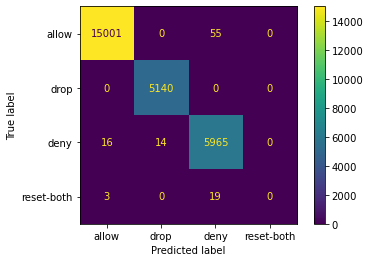

In [ ]:
# get the confusion matrix
cm = confusion_matrix(y_test, preds)

# display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y[1])
disp.plot()

In [ ]:
print(classification_report(y_test, preds, target_names=y[1], zero_division=0))

              precision    recall  f1-score   support

       allow       1.00      1.00      1.00     15056
        drop       1.00      1.00      1.00      5140
        deny       0.99      0.99      0.99      5995
  reset-both       0.00      0.00      0.00        22

    accuracy                           1.00     26213
   macro avg       0.75      0.75      0.75     26213
weighted avg       1.00      1.00      1.00     26213



In [ ]:
%%time
from sklearn.svm import LinearSVC, SVC
from tqdm import tqdm

svm = SVC(C=1., kernel='rbf', degree=2, gamma='scale', class_weight= 'balanced', cache_size=500)

# train the classifier using the sample data and show a progress bar
for i in tqdm(range(100)):
    svm.fit(X_train, y_train)

100%|██████████| 100/100 [37:57<00:00, 22.78s/it]

CPU times: user 35min 36s, sys: 2min 11s, total: 37min 48s
Wall time: 37min 57s


In [ ]:
%%time
preds = svm.predict(X_test)

CPU times: user 11.7 s, sys: 189 ms, total: 11.9 s
Wall time: 12.8 s


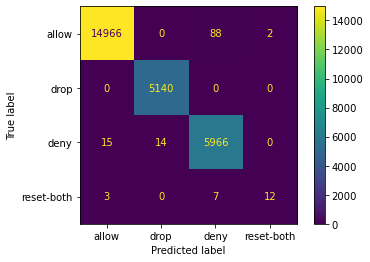

In [ ]:
# get the confusion matrix
cm = confusion_matrix(y_test, preds)

# display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y[1])
disp.plot()

In [ ]:
print(classification_report(y_test, preds, target_names=y[1], zero_division=0))

              precision    recall  f1-score   support

       allow       1.00      0.99      1.00     15056
        drop       1.00      1.00      1.00      5140
        deny       0.98      1.00      0.99      5995
  reset-both       0.86      0.55      0.67        22

    accuracy                           1.00     26213
   macro avg       0.96      0.88      0.91     26213
weighted avg       1.00      1.00      1.00     26213



In [ ]:
%%time
from sklearn.svm import LinearSVC, SVC
from tqdm import tqdm

svm = SVC(C=.5, kernel='rbf', degree=2, gamma='scale', class_weight= 'balanced', cache_size=500)

# train the classifier using the sample data and show a progress bar
for i in tqdm(range(100)):
    svm.fit(X_train, y_train)

100%|██████████| 100/100 [36:56<00:00, 22.16s/it]

CPU times: user 34min 36s, sys: 2min 9s, total: 36min 45s
Wall time: 36min 56s


In [ ]:
%%time
preds = svm.predict(X_test)

CPU times: user 11.5 s, sys: 136 ms, total: 11.7 s
Wall time: 12.3 s


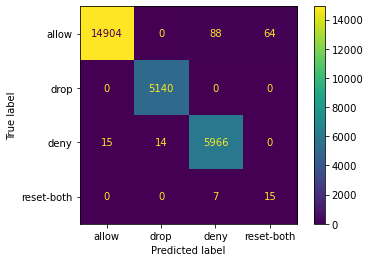

In [ ]:
# get the confusion matrix
cm = confusion_matrix(y_test, preds)

# display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y[1])
disp.plot()

In [ ]:
print(classification_report(y_test, preds, target_names=y[1], zero_division=0))

              precision    recall  f1-score   support

       allow       1.00      0.99      0.99     15056
        drop       1.00      1.00      1.00      5140
        deny       0.98      1.00      0.99      5995
  reset-both       0.19      0.68      0.30        22

    accuracy                           0.99     26213
   macro avg       0.79      0.92      0.82     26213
weighted avg       0.99      0.99      0.99     26213



### Use Best Parameters on 80/20 Split

In [ ]:
%%time

# split data into training and testing sets 80/20
X_train_bool, X_test_bool, y_train, y_test = train_test_split(bool_cols, y[0], test_size=0.2, stratify=y[0], random_state=42)
X_train_non_bool, X_test_non_bool, _, _ = train_test_split(non_bool_cols, y[0], test_size=0.2, stratify=y[0], random_state=42)

CPU times: user 1min 20s, sys: 950 ms, total: 1min 21s
Wall time: 1min 22s


In [ ]:
# create a StandardScaler object and fit on the non-boolean training set only
scaler = StandardScaler(with_mean=False)
scaler.fit(X_train_non_bool)

StandardScaler(with_mean=False)

In [ ]:
%%time
# transform the non-boolean training and testing sets using the scaler
X_train_non_bool_scaled = scaler.transform(X_train_non_bool)
X_test_non_bool_scaled = scaler.transform(X_test_non_bool)

CPU times: user 23 ms, sys: 5.55 ms, total: 28.6 ms
Wall time: 28.8 ms


In [ ]:
%%time

# Join Scaled and Non Scaled Columns X_train
X_train = hstack([X_train_non_bool_scaled, csr_matrix(X_train_bool.values)])

CPU times: user 2min 38s, sys: 42.1 s, total: 3min 20s
Wall time: 3min 31s


In [ ]:
%%time
# Join Scaled and Non Scaled Columns X_test
X_test = hstack([X_test_non_bool_scaled, X_test_bool])

CPU times: user 49.7 s, sys: 18.5 s, total: 1min 8s
Wall time: 1min 14s


In [ ]:
%%time
from sklearn.svm import LinearSVC, SVC
from tqdm import tqdm

svm = SVC(C=1., kernel='rbf', degree=2, gamma='scale', class_weight= 'balanced', cache_size=500)

# train the classifier using the sample data and show a progress bar
for i in tqdm(range(100)):
    svm.fit(X_train, y_train)

100%|██████████| 100/100 [1:01:31<00:00, 36.91s/it]

CPU times: user 58min 40s, sys: 2min 31s, total: 1h 1min 12s
Wall time: 1h 1min 31s


In [ ]:
%%time
preds = svm.predict(X_test)

CPU times: user 7.29 s, sys: 106 ms, total: 7.39 s
Wall time: 7.95 s


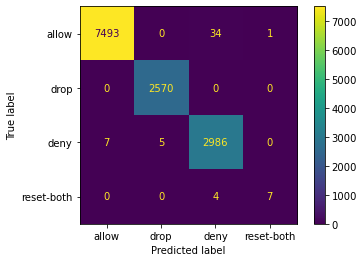

In [ ]:
# get the confusion matrix
cm = confusion_matrix(y_test, preds)

# display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y[1])
disp.plot()

In [ ]:
print(classification_report(y_test, preds, target_names=y[1], zero_division=0))

              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7528
        drop       1.00      1.00      1.00      2570
        deny       0.99      1.00      0.99      2998
  reset-both       0.88      0.64      0.74        11

    accuracy                           1.00     13107
   macro avg       0.96      0.91      0.93     13107
weighted avg       1.00      1.00      1.00     13107

